In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import tensorflow as tf
# seed 값 설정
seed = 3
np.random.seed(seed)
tf.random.set_seed(3)
df = pd.read_csv('../data/sonar.csv', header=None)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [78]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R


In [79]:
dataset = df.values
X = dataset[:,0:60]
Y_obj = dataset[:,60]

In [80]:
# 문자열 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [81]:
# 모델 설정
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [82]:
# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [83]:
X=np.asanyarray(X).astype(np.float32)
# 모델 실행
model.fit(X, Y, epochs=200, batch_size=5)
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/200
42/42 [==============================] - 0s 785us/step - loss: 0.2432 - accuracy: 0.5865
Epoch 2/200
42/42 [==============================] - 0s 738us/step - loss: 0.2288 - accuracy: 0.6394
Epoch 3/200
42/42 [==============================] - 0s 738us/step - loss: 0.2187 - accuracy: 0.6490
Epoch 4/200
42/42 [==============================] - 0s 714us/step - loss: 0.2031 - accuracy: 0.7260
Epoch 5/200
42/42 [==============================] - 0s 738us/step - loss: 0.1893 - accuracy: 0.7692
Epoch 6/200
42/42 [==============================] - 0s 761us/step - loss: 0.1802 - accuracy: 0.7596
Epoch 7/200
42/42 [==============================] - 0s 714us/step - loss: 0.1677 - accuracy: 0.7740
Epoch 8/200
42/42 [==============================] - 0s 714us/step - loss: 0.1590 - accuracy: 0.7837
Epoch 9/200
42/42 [==============================] - 0s 761us/step - loss: 0.1558 - accuracy: 0.7885
Epoch 10/200
42/42 [==============================] - 0s 761us/step - loss: 0.1483 - accura

42/42 [==============================] - 0s 785us/step - loss: 0.0073 - accuracy: 0.9952
Epoch 161/200
42/42 [==============================] - 0s 714us/step - loss: 0.0076 - accuracy: 0.9952
Epoch 162/200
42/42 [==============================] - 0s 809us/step - loss: 0.0071 - accuracy: 0.9952
Epoch 163/200
42/42 [==============================] - 0s 809us/step - loss: 0.0099 - accuracy: 0.9952
Epoch 164/200
42/42 [==============================] - 0s 809us/step - loss: 0.0088 - accuracy: 0.9952
Epoch 165/200
42/42 [==============================] - 0s 785us/step - loss: 0.0073 - accuracy: 0.9952
Epoch 166/200
42/42 [==============================] - 0s 761us/step - loss: 0.0073 - accuracy: 0.9952
Epoch 167/200
42/42 [==============================] - 0s 738us/step - loss: 0.0070 - accuracy: 0.9952
Epoch 168/200
42/42 [==============================] - 0s 714us/step - loss: 0.0079 - accuracy: 0.9952
Epoch 169/200
42/42 [==============================] - 0s 642us/step - loss: 0.0068 - a

In [84]:
from sklearn.model_selection import train_test_split
# 학습셋과 테스트셋의 구분
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

In [86]:
model.fit(X_train, Y_train, epochs=130, batch_size=5)
  
# 테스트셋에 모델 적용
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/130
29/29 [==============================] - 0s 793us/step - loss: 0.0077 - accuracy: 0.9931
Epoch 2/130
29/29 [==============================] - 0s 896us/step - loss: 0.0079 - accuracy: 0.9931
Epoch 3/130
29/29 [==============================] - 0s 862us/step - loss: 0.0075 - accuracy: 0.9931
Epoch 4/130
29/29 [==============================] - 0s 896us/step - loss: 0.0075 - accuracy: 0.9931
Epoch 5/130
29/29 [==============================] - 0s 861us/step - loss: 0.0074 - accuracy: 0.9931
Epoch 6/130
29/29 [==============================] - 0s 862us/step - loss: 0.0073 - accuracy: 0.9931
Epoch 7/130
29/29 [==============================] - 0s 862us/step - loss: 0.0074 - accuracy: 0.9931
Epoch 8/130
29/29 [==============================] - 0s 896us/step - loss: 0.0073 - accuracy: 0.9931
Epoch 9/130
29/29 [==============================] - 0s 862us/step - loss: 0.0073 - accuracy: 0.9931
Epoch 10/130
29/29 [==============================] - 0s 862us/step - loss: 0.0073 - accura

In [87]:
from keras.models import load_model  
 
model.save('my_model.h5')

In [88]:
model = load_model('my_model.h5')

In [89]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))  # 불러온 모델로 테스트 실행

2/2 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 1.0000

 Test Accuracy: 1.0000


In [90]:
from sklearn.model_selection import StratifiedKFold
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [91]:
for train, test in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=100, batch_size=5)

Epoch 1/100
38/38 [==============================] - 0s 737us/step - loss: 0.2577 - accuracy: 0.4439
Epoch 2/100
38/38 [==============================] - 0s 736us/step - loss: 0.2422 - accuracy: 0.6310
Epoch 3/100
38/38 [==============================] - 0s 763us/step - loss: 0.2371 - accuracy: 0.6257
Epoch 4/100
38/38 [==============================] - 0s 816us/step - loss: 0.2313 - accuracy: 0.6471
Epoch 5/100
38/38 [==============================] - 0s 710us/step - loss: 0.2230 - accuracy: 0.6791
Epoch 6/100
38/38 [==============================] - 0s 710us/step - loss: 0.2149 - accuracy: 0.7166
Epoch 7/100
38/38 [==============================] - 0s 736us/step - loss: 0.2067 - accuracy: 0.7112
Epoch 8/100
38/38 [==============================] - 0s 710us/step - loss: 0.1970 - accuracy: 0.7273
Epoch 9/100
38/38 [==============================] - 0s 763us/step - loss: 0.1853 - accuracy: 0.7701
Epoch 10/100
38/38 [==============================] - 0s 763us/step - loss: 0.1736 - accura

Epoch 81/100
38/38 [==============================] - 0s 763us/step - loss: 0.0403 - accuracy: 0.9626
Epoch 82/100
38/38 [==============================] - 0s 763us/step - loss: 0.0382 - accuracy: 0.9679
Epoch 83/100
38/38 [==============================] - 0s 789us/step - loss: 0.0408 - accuracy: 0.9626
Epoch 84/100
38/38 [==============================] - 0s 736us/step - loss: 0.0389 - accuracy: 0.9626
Epoch 85/100
38/38 [==============================] - 0s 736us/step - loss: 0.0517 - accuracy: 0.9358
Epoch 86/100
38/38 [==============================] - 0s 736us/step - loss: 0.0380 - accuracy: 0.9733
Epoch 87/100
38/38 [==============================] - 0s 710us/step - loss: 0.0385 - accuracy: 0.9733
Epoch 88/100
38/38 [==============================] - 0s 710us/step - loss: 0.0374 - accuracy: 0.9626
Epoch 89/100
38/38 [==============================] - 0s 763us/step - loss: 0.0343 - accuracy: 0.9786
Epoch 90/100
38/38 [==============================] - 0s 789us/step - loss: 0.0378

38/38 [==============================] - 0s 684us/step - loss: 0.0844 - accuracy: 0.9144
Epoch 42/100
38/38 [==============================] - 0s 736us/step - loss: 0.0779 - accuracy: 0.9198
Epoch 43/100
38/38 [==============================] - 0s 710us/step - loss: 0.0736 - accuracy: 0.9144
Epoch 44/100
38/38 [==============================] - 0s 684us/step - loss: 0.0746 - accuracy: 0.9198
Epoch 45/100
38/38 [==============================] - 0s 736us/step - loss: 0.0723 - accuracy: 0.9305
Epoch 46/100
38/38 [==============================] - 0s 894us/step - loss: 0.0757 - accuracy: 0.9037
Epoch 47/100
38/38 [==============================] - 0s 789us/step - loss: 0.0712 - accuracy: 0.9091
Epoch 48/100
38/38 [==============================] - 0s 736us/step - loss: 0.0665 - accuracy: 0.9358
Epoch 49/100
38/38 [==============================] - 0s 710us/step - loss: 0.0658 - accuracy: 0.9358
Epoch 50/100
38/38 [==============================] - 0s 710us/step - loss: 0.0648 - accuracy: 

38/38 [==============================] - 0s 684us/step - loss: 0.2421 - accuracy: 0.5936
Epoch 2/100
38/38 [==============================] - 0s 710us/step - loss: 0.2270 - accuracy: 0.6684
Epoch 3/100
38/38 [==============================] - 0s 720us/step - loss: 0.2188 - accuracy: 0.6845
Epoch 4/100
38/38 [==============================] - 0s 736us/step - loss: 0.2082 - accuracy: 0.7059
Epoch 5/100
38/38 [==============================] - 0s 684us/step - loss: 0.1955 - accuracy: 0.7380
Epoch 6/100
38/38 [==============================] - 0s 736us/step - loss: 0.1846 - accuracy: 0.7540
Epoch 7/100
38/38 [==============================] - 0s 710us/step - loss: 0.1768 - accuracy: 0.7807
Epoch 8/100
38/38 [==============================] - 0s 710us/step - loss: 0.1655 - accuracy: 0.8021
Epoch 9/100
38/38 [==============================] - 0s 736us/step - loss: 0.1594 - accuracy: 0.8021
Epoch 10/100
38/38 [==============================] - 0s 684us/step - loss: 0.1515 - accuracy: 0.8128
E

38/38 [==============================] - 0s 736us/step - loss: 0.0589 - accuracy: 0.9465
Epoch 62/100
38/38 [==============================] - 0s 763us/step - loss: 0.0562 - accuracy: 0.9305
Epoch 63/100
38/38 [==============================] - 0s 763us/step - loss: 0.0528 - accuracy: 0.9572
Epoch 64/100
38/38 [==============================] - 0s 763us/step - loss: 0.0591 - accuracy: 0.9358
Epoch 65/100
38/38 [==============================] - 0s 763us/step - loss: 0.0524 - accuracy: 0.9519
Epoch 66/100
38/38 [==============================] - 0s 684us/step - loss: 0.0509 - accuracy: 0.9519
Epoch 67/100
38/38 [==============================] - 0s 736us/step - loss: 0.0546 - accuracy: 0.9412
Epoch 68/100
38/38 [==============================] - 0s 710us/step - loss: 0.0475 - accuracy: 0.9572
Epoch 69/100
38/38 [==============================] - 0s 736us/step - loss: 0.0465 - accuracy: 0.9679
Epoch 70/100
38/38 [==============================] - 0s 815us/step - loss: 0.0447 - accuracy: 

38/38 [==============================] - 0s 736us/step - loss: 0.1299 - accuracy: 0.8396
Epoch 21/100
38/38 [==============================] - 0s 710us/step - loss: 0.1221 - accuracy: 0.8503
Epoch 22/100
38/38 [==============================] - 0s 736us/step - loss: 0.1316 - accuracy: 0.8075
Epoch 23/100
38/38 [==============================] - 0s 789us/step - loss: 0.1184 - accuracy: 0.8449
Epoch 24/100
38/38 [==============================] - 0s 736us/step - loss: 0.1185 - accuracy: 0.8396
Epoch 25/100
38/38 [==============================] - 0s 736us/step - loss: 0.1143 - accuracy: 0.8449
Epoch 26/100
38/38 [==============================] - 0s 684us/step - loss: 0.1141 - accuracy: 0.8610
Epoch 27/100
38/38 [==============================] - 0s 736us/step - loss: 0.1080 - accuracy: 0.8717
Epoch 28/100
38/38 [==============================] - 0s 710us/step - loss: 0.1047 - accuracy: 0.8610
Epoch 29/100
38/38 [==============================] - 0s 710us/step - loss: 0.1058 - accuracy: 

38/38 [==============================] - 0s 684us/step - loss: 0.0243 - accuracy: 0.9787
Epoch 81/100
38/38 [==============================] - 0s 736us/step - loss: 0.0227 - accuracy: 0.9787
Epoch 82/100
38/38 [==============================] - 0s 710us/step - loss: 0.0249 - accuracy: 0.9734
Epoch 83/100
38/38 [==============================] - 0s 710us/step - loss: 0.0215 - accuracy: 0.9787
Epoch 84/100
38/38 [==============================] - 0s 763us/step - loss: 0.0202 - accuracy: 0.9840
Epoch 85/100
38/38 [==============================] - 0s 763us/step - loss: 0.0176 - accuracy: 0.9894
Epoch 86/100
38/38 [==============================] - 0s 684us/step - loss: 0.0189 - accuracy: 0.9840
Epoch 87/100
38/38 [==============================] - 0s 789us/step - loss: 0.0169 - accuracy: 0.9894
Epoch 88/100
38/38 [==============================] - 0s 710us/step - loss: 0.0184 - accuracy: 0.9840
Epoch 89/100
38/38 [==============================] - 0s 710us/step - loss: 0.0158 - accuracy: 

In [92]:
# 10개의 파일로 쪼갬
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [93]:
skf

StratifiedKFold(n_splits=10, random_state=3, shuffle=True)

In [97]:
accuracy = []
# 모델의 설정, 컴파일, 실행
for train, test in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=100, batch_size=5)
    k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])
    accuracy.append(k_accuracy)

Epoch 1/100
38/38 [==============================] - 0s 736us/step - loss: 0.2568 - accuracy: 0.4920
Epoch 2/100
38/38 [==============================] - 0s 789us/step - loss: 0.2363 - accuracy: 0.5936
Epoch 3/100
38/38 [==============================] - 0s 763us/step - loss: 0.2258 - accuracy: 0.6364
Epoch 4/100
38/38 [==============================] - 0s 789us/step - loss: 0.2145 - accuracy: 0.7326
Epoch 5/100
38/38 [==============================] - 0s 763us/step - loss: 0.2036 - accuracy: 0.7594
Epoch 6/100
38/38 [==============================] - 0s 815us/step - loss: 0.1914 - accuracy: 0.7647
Epoch 7/100
38/38 [==============================] - 0s 789us/step - loss: 0.1805 - accuracy: 0.7754
Epoch 8/100
38/38 [==============================] - 0s 763us/step - loss: 0.1711 - accuracy: 0.7914
Epoch 9/100
38/38 [==============================] - 0s 763us/step - loss: 0.1628 - accuracy: 0.7968
Epoch 10/100
38/38 [==============================] - 0s 789us/step - loss: 0.1534 - accura

38/38 [==============================] - 0s 789us/step - loss: 0.0594 - accuracy: 0.9305
Epoch 61/100
38/38 [==============================] - ETA: 0s - loss: 0.0677 - accuracy: 0.80 - 0s 815us/step - loss: 0.0591 - accuracy: 0.9465
Epoch 62/100
38/38 [==============================] - 0s 710us/step - loss: 0.0589 - accuracy: 0.9465
Epoch 63/100
38/38 [==============================] - 0s 684us/step - loss: 0.0591 - accuracy: 0.9519
Epoch 64/100
38/38 [==============================] - 0s 710us/step - loss: 0.0569 - accuracy: 0.9358
Epoch 65/100
38/38 [==============================] - 0s 736us/step - loss: 0.0542 - accuracy: 0.9465
Epoch 66/100
38/38 [==============================] - 0s 710us/step - loss: 0.0510 - accuracy: 0.9572
Epoch 67/100
38/38 [==============================] - 0s 710us/step - loss: 0.0559 - accuracy: 0.9358
Epoch 68/100
38/38 [==============================] - 0s 710us/step - loss: 0.0490 - accuracy: 0.9572
Epoch 69/100
38/38 [==============================] -

38/38 [==============================] - 0s 710us/step - loss: 0.1308 - accuracy: 0.8128
Epoch 19/100
38/38 [==============================] - 0s 710us/step - loss: 0.1247 - accuracy: 0.8449
Epoch 20/100
38/38 [==============================] - 0s 684us/step - loss: 0.1222 - accuracy: 0.8449
Epoch 21/100
38/38 [==============================] - 0s 736us/step - loss: 0.1167 - accuracy: 0.8610
Epoch 22/100
38/38 [==============================] - 0s 710us/step - loss: 0.1297 - accuracy: 0.8396
Epoch 23/100
38/38 [==============================] - 0s 684us/step - loss: 0.1107 - accuracy: 0.8663
Epoch 24/100
38/38 [==============================] - 0s 684us/step - loss: 0.1252 - accuracy: 0.8235
Epoch 25/100
38/38 [==============================] - 0s 710us/step - loss: 0.1058 - accuracy: 0.8663
Epoch 26/100
38/38 [==============================] - 0s 736us/step - loss: 0.1052 - accuracy: 0.8663
Epoch 27/100
38/38 [==============================] - ETA: 0s - loss: 0.0244 - accuracy: 1.00 -

38/38 [==============================] - 0s 736us/step - loss: 0.0180 - accuracy: 0.9893
Epoch 99/100
38/38 [==============================] - 0s 736us/step - loss: 0.0198 - accuracy: 0.9786
Epoch 100/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0588 - accuracy: 0.9524
Epoch 1/100
38/38 [==============================] - 0s 710us/step - loss: 0.2499 - accuracy: 0.5348
Epoch 2/100
38/38 [==============================] - 0s 710us/step - loss: 0.2402 - accuracy: 0.5294
Epoch 3/100
38/38 [==============================] - 0s 736us/step - loss: 0.2341 - accuracy: 0.5401
Epoch 4/100
38/38 [==============================] - 0s 736us/step - loss: 0.2268 - accuracy: 0.5989
Epoch 5/100
38/38 [==============================] - 0s 684us/step - loss: 0.2194 - accuracy: 0.6631
Epoch 6/100
38/38 [==============================] - 0s 710us/step - loss: 0.2098 - accuracy: 0.7166
Epoch 7/100
38/38 [==============================] - 0s 710us/step - loss: 0.2019 - accuracy: 0.7166
Epo

38/38 [==============================] - 0s 894us/step - loss: 0.0596 - accuracy: 0.9412
Epoch 57/100
38/38 [==============================] - 0s 815us/step - loss: 0.0571 - accuracy: 0.9358
Epoch 58/100
38/38 [==============================] - 0s 684us/step - loss: 0.0569 - accuracy: 0.9465
Epoch 59/100
38/38 [==============================] - 0s 710us/step - loss: 0.0587 - accuracy: 0.9251
Epoch 60/100
38/38 [==============================] - 0s 710us/step - loss: 0.0519 - accuracy: 0.9572
Epoch 61/100
38/38 [==============================] - 0s 657us/step - loss: 0.0525 - accuracy: 0.9412
Epoch 62/100
38/38 [==============================] - 0s 710us/step - loss: 0.0513 - accuracy: 0.9519
Epoch 63/100
38/38 [==============================] - 0s 710us/step - loss: 0.0500 - accuracy: 0.9519
Epoch 64/100
38/38 [==============================] - 0s 684us/step - loss: 0.0581 - accuracy: 0.9305
Epoch 65/100
38/38 [==============================] - 0s 684us/step - loss: 0.0495 - accuracy: 

38/38 [==============================] - 0s 684us/step - loss: 0.1429 - accuracy: 0.8342
Epoch 15/100
38/38 [==============================] - 0s 763us/step - loss: 0.1383 - accuracy: 0.8342
Epoch 16/100
38/38 [==============================] - 0s 736us/step - loss: 0.1388 - accuracy: 0.8182
Epoch 17/100
38/38 [==============================] - 0s 684us/step - loss: 0.1315 - accuracy: 0.8235
Epoch 18/100
38/38 [==============================] - 0s 736us/step - loss: 0.1286 - accuracy: 0.8503
Epoch 19/100
38/38 [==============================] - 0s 736us/step - loss: 0.1248 - accuracy: 0.8396
Epoch 20/100
38/38 [==============================] - 0s 763us/step - loss: 0.1274 - accuracy: 0.8289
Epoch 21/100
38/38 [==============================] - 0s 710us/step - loss: 0.1193 - accuracy: 0.8717
Epoch 22/100
38/38 [==============================] - 0s 684us/step - loss: 0.1303 - accuracy: 0.8128
Epoch 23/100
38/38 [==============================] - 0s 684us/step - loss: 0.1173 - accuracy: 

38/38 [==============================] - 0s 684us/step - loss: 0.0659 - accuracy: 0.9468
Epoch 74/100
38/38 [==============================] - 0s 710us/step - loss: 0.0674 - accuracy: 0.9362
Epoch 75/100
38/38 [==============================] - 0s 710us/step - loss: 0.0648 - accuracy: 0.9202
Epoch 76/100
38/38 [==============================] - ETA: 0s - loss: 0.1056 - accuracy: 0.80 - 0s 684us/step - loss: 0.0658 - accuracy: 0.9309
Epoch 77/100
38/38 [==============================] - 0s 710us/step - loss: 0.0644 - accuracy: 0.9415
Epoch 78/100
38/38 [==============================] - 0s 736us/step - loss: 0.0605 - accuracy: 0.9415
Epoch 79/100
38/38 [==============================] - 0s 736us/step - loss: 0.0593 - accuracy: 0.9362
Epoch 80/100
38/38 [==============================] - 0s 736us/step - loss: 0.0584 - accuracy: 0.9468
Epoch 81/100
38/38 [==============================] - 0s 710us/step - loss: 0.0559 - accuracy: 0.9574
Epoch 82/100
38/38 [==============================] -

In [98]:
# 결과 출력
print("\n %.f fold accuracy:" % n_fold, accuracy)


 10 fold accuracy: ['0.7619', '0.9048', '0.7619', '0.9524', '0.8095', '0.8095', '0.7143', '0.8571', '0.9500', '0.8000']


In [99]:
df_pre = pd.read_csv('../data/wine.csv', header=None)
df = df_pre.sample(frac=1)

In [100]:
print(df.head(3))

        0      1     2    3      4     5     6        7     8     9      10  \
6245   5.9  0.180  0.28  1.0  0.037  24.0  88.0  0.99094  3.29  0.55  10.65   
486   10.2  0.670  0.39  1.9  0.054   6.0  17.0  0.99760  3.17  0.47  10.00   
273    8.4  0.715  0.20  2.4  0.076  10.0  38.0  0.99735  3.31  0.64   9.40   

      11  12  
6245   7   0  
486    5   1  
273    5   1  


In [34]:
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [37]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
5316,6.3,0.18,0.24,3.4,0.053,20.0,119.0,0.99373,3.11,0.52,9.2,6,0
5210,6.8,0.14,0.18,1.4,0.047,30.0,90.0,0.99164,3.27,0.54,11.2,6,0


In [38]:
df.values

array([[ 6.3 ,  0.18,  0.24, ...,  9.2 ,  6.  ,  0.  ],
       [ 6.8 ,  0.14,  0.18, ..., 11.2 ,  6.  ,  0.  ],
       [ 7.3 ,  0.22,  0.5 , ...,  9.  ,  6.  ,  0.  ],
       ...,
       [ 6.8 ,  0.2 ,  0.59, ...,  9.1 ,  6.  ,  0.  ],
       [ 6.6 ,  0.22,  0.37, ..., 10.3 ,  7.  ,  0.  ],
       [ 8.7 ,  0.22,  0.42, ..., 10.  ,  5.  ,  0.  ]])

In [101]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
 
import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt
  
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)
  
# 데이터 입력
df_pre = pd.read_csv('../data/wine.csv', header=None)
df = df_pre.sample(frac=1)
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [102]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
  

In [103]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  
# 모델 실행
model.fit(X, Y, epochs=200, batch_size=200)

Epoch 1/200
33/33 [==============================] - 0s 817us/step - loss: 0.6740 - accuracy: 0.7522
Epoch 2/200
33/33 [==============================] - 0s 848us/step - loss: 0.3072 - accuracy: 0.8952
Epoch 3/200
33/33 [==============================] - 0s 878us/step - loss: 0.2476 - accuracy: 0.9235
Epoch 4/200
33/33 [==============================] - 0s 848us/step - loss: 0.2302 - accuracy: 0.9272
Epoch 5/200
33/33 [==============================] - 0s 909us/step - loss: 0.2201 - accuracy: 0.9280
Epoch 6/200
33/33 [==============================] - 0s 939us/step - loss: 0.2100 - accuracy: 0.9312
Epoch 7/200
33/33 [==============================] - 0s 848us/step - loss: 0.2019 - accuracy: 0.9338
Epoch 8/200
33/33 [==============================] - 0s 848us/step - loss: 0.1985 - accuracy: 0.9341
Epoch 9/200
33/33 [==============================] - 0s 939us/step - loss: 0.1922 - accuracy: 0.9364
Epoch 10/200
33/33 [==============================] - 0s 878us/step - loss: 0.1879 - accura

33/33 [==============================] - 0s 909us/step - loss: 0.0634 - accuracy: 0.9798
Epoch 82/200
33/33 [==============================] - 0s 878us/step - loss: 0.0655 - accuracy: 0.9805
Epoch 83/200
33/33 [==============================] - 0s 878us/step - loss: 0.0638 - accuracy: 0.9809
Epoch 84/200
33/33 [==============================] - 0s 848us/step - loss: 0.0638 - accuracy: 0.9803
Epoch 85/200
33/33 [==============================] - 0s 818us/step - loss: 0.0629 - accuracy: 0.9801
Epoch 86/200
33/33 [==============================] - 0s 818us/step - loss: 0.0636 - accuracy: 0.9797
Epoch 87/200
33/33 [==============================] - 0s 818us/step - loss: 0.0602 - accuracy: 0.9818
Epoch 88/200
33/33 [==============================] - 0s 818us/step - loss: 0.0632 - accuracy: 0.9801
Epoch 89/200
33/33 [==============================] - 0s 787us/step - loss: 0.0625 - accuracy: 0.9811
Epoch 90/200
33/33 [==============================] - 0s 787us/step - loss: 0.0660 - accuracy: 

In [104]:
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

204/204 [==============================] - 0s 607us/step - loss: 0.0470 - accuracy: 0.9861

 Accuracy: 0.9861


In [105]:
import os
 
MODEL_DIR = './model/'             # 모델을 저장하는 폴더 
if not os.path.exists(MODEL_DIR):  # 만일 위의 폴더가 존재하지 않으면
    os.mkdir(MODEL_DIR)            # 이 이름의 폴더를 만들어 줌 

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

In [110]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [111]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1)
model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer])


Epoch 00001: saving model to ./model/01-0.0622.hdf5

Epoch 00002: saving model to ./model/02-0.0507.hdf5

Epoch 00003: saving model to ./model/03-0.0476.hdf5

Epoch 00004: saving model to ./model/04-0.0458.hdf5

Epoch 00005: saving model to ./model/05-0.0486.hdf5

Epoch 00006: saving model to ./model/06-0.0477.hdf5

Epoch 00007: saving model to ./model/07-0.0479.hdf5

Epoch 00008: saving model to ./model/08-0.0468.hdf5

Epoch 00009: saving model to ./model/09-0.0479.hdf5

Epoch 00010: saving model to ./model/10-0.0492.hdf5

Epoch 00011: saving model to ./model/11-0.0564.hdf5

Epoch 00012: saving model to ./model/12-0.0508.hdf5

Epoch 00013: saving model to ./model/13-0.0476.hdf5

Epoch 00014: saving model to ./model/14-0.0463.hdf5

Epoch 00015: saving model to ./model/15-0.0476.hdf5

Epoch 00016: saving model to ./model/16-0.0475.hdf5

Epoch 00017: saving model to ./model/17-0.0528.hdf5

Epoch 00018: saving model to ./model/18-0.0467.hdf5

Epoch 00019: saving model to ./model/19-0.048


Epoch 00158: saving model to ./model/158-0.0400.hdf5

Epoch 00159: saving model to ./model/159-0.0418.hdf5

Epoch 00160: saving model to ./model/160-0.0535.hdf5

Epoch 00161: saving model to ./model/161-0.0428.hdf5

Epoch 00162: saving model to ./model/162-0.0448.hdf5

Epoch 00163: saving model to ./model/163-0.0429.hdf5

Epoch 00164: saving model to ./model/164-0.0440.hdf5

Epoch 00165: saving model to ./model/165-0.0418.hdf5

Epoch 00166: saving model to ./model/166-0.0414.hdf5

Epoch 00167: saving model to ./model/167-0.0508.hdf5

Epoch 00168: saving model to ./model/168-0.0425.hdf5

Epoch 00169: saving model to ./model/169-0.0411.hdf5

Epoch 00170: saving model to ./model/170-0.0514.hdf5

Epoch 00171: saving model to ./model/171-0.0402.hdf5

Epoch 00172: saving model to ./model/172-0.0396.hdf5

Epoch 00173: saving model to ./model/173-0.0419.hdf5

Epoch 00174: saving model to ./model/174-0.0409.hdf5

Epoch 00175: saving model to ./model/175-0.0421.hdf5

Epoch 00176: saving model t

In [112]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [113]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
 
import pandas as pd
import numpy
import os
import tensorflow as tf
  
# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)
 
df_pre = pd.read_csv('../data/wine.csv', header=None)
df = df_pre.sample(frac=1)
 
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]
  
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
  
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
  


 # 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
  
# 모델 실행 및 저장
model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.38706, saving model to ./model/01-0.3871.hdf5

Epoch 00002: val_loss improved from 0.38706 to 0.28561, saving model to ./model/02-0.2856.hdf5

Epoch 00003: val_loss improved from 0.28561 to 0.24630, saving model to ./model/03-0.2463.hdf5

Epoch 00004: val_loss improved from 0.24630 to 0.23385, saving model to ./model/04-0.2338.hdf5

Epoch 00005: val_loss improved from 0.23385 to 0.22901, saving model to ./model/05-0.2290.hdf5

Epoch 00006: val_loss improved from 0.22901 to 0.22135, saving model to ./model/06-0.2214.hdf5

Epoch 00007: val_loss improved from 0.22135 to 0.21528, saving model to ./model/07-0.2153.hdf5

Epoch 00008: val_loss improved from 0.21528 to 0.20855, saving model to ./model/08-0.2086.hdf5

Epoch 00009: val_loss improved from 0.20855 to 0.19963, saving model to ./model/09-0.1996.hdf5

Epoch 00010: val_loss improved from 0.19963 to 0.19792, saving model to ./model/10-0.1979.hdf5

Epoch 00011: val_loss improved from 0.19792


Epoch 00110: val_loss did not improve from 0.05556

Epoch 00111: val_loss did not improve from 0.05556

Epoch 00112: val_loss did not improve from 0.05556

Epoch 00113: val_loss did not improve from 0.05556

Epoch 00114: val_loss improved from 0.05556 to 0.05504, saving model to ./model/114-0.0550.hdf5

Epoch 00115: val_loss did not improve from 0.05504

Epoch 00116: val_loss did not improve from 0.05504

Epoch 00117: val_loss improved from 0.05504 to 0.05482, saving model to ./model/117-0.0548.hdf5

Epoch 00118: val_loss did not improve from 0.05482

Epoch 00119: val_loss improved from 0.05482 to 0.05378, saving model to ./model/119-0.0538.hdf5

Epoch 00120: val_loss did not improve from 0.05378

Epoch 00121: val_loss did not improve from 0.05378

Epoch 00122: val_loss improved from 0.05378 to 0.05376, saving model to ./model/122-0.0538.hdf5

Epoch 00123: val_loss did not improve from 0.05376

Epoch 00124: val_loss improved from 0.05376 to 0.05323, saving model to ./model/124-0.0532.

In [114]:
df = df_pre.sample(frac=0.15)
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

Epoch 1/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0473 - accuracy: 0.9855 - val_loss: 0.0505 - val_accuracy: 0.9818
Epoch 2/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0479 - accuracy: 0.9853 - val_loss: 0.0559 - val_accuracy: 0.9855
Epoch 3/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0468 - accuracy: 0.9869 - val_loss: 0.0497 - val_accuracy: 0.9828
Epoch 4/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0468 - accuracy: 0.9862 - val_loss: 0.0518 - val_accuracy: 0.9818
Epoch 5/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0475 - accuracy: 0.9860 - val_loss: 0.0500 - val_accuracy: 0.9832
Epoch 6/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0480 - accuracy: 0.9841 - val_loss: 0.0550 - val_accuracy: 0.9851
Epoch 7/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0478 - accuracy: 0.9844 - val_loss: 0.0497 - val_accuracy: 0.9855
Epoch 8/3500
9/9 [==

9/9 [==============================] - 0s 4ms/step - loss: 0.0446 - accuracy: 0.9869 - val_loss: 0.0579 - val_accuracy: 0.9823
Epoch 118/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0453 - accuracy: 0.9855 - val_loss: 0.0491 - val_accuracy: 0.9832
Epoch 119/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0411 - accuracy: 0.9871 - val_loss: 0.0490 - val_accuracy: 0.9879
Epoch 120/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0463 - accuracy: 0.9858 - val_loss: 0.0504 - val_accuracy: 0.9851
Epoch 121/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0429 - accuracy: 0.9864 - val_loss: 0.0507 - val_accuracy: 0.9841
Epoch 122/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0438 - accuracy: 0.9858 - val_loss: 0.0551 - val_accuracy: 0.9828
Epoch 123/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0446 - accuracy: 0.9871 - val_loss: 0.0527 - val_accuracy: 0.9837
Epoch 124/3500
9/9 [=

Epoch 175/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0421 - accuracy: 0.9876 - val_loss: 0.0512 - val_accuracy: 0.9869
Epoch 176/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0394 - accuracy: 0.9885 - val_loss: 0.0533 - val_accuracy: 0.9828
Epoch 177/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0414 - accuracy: 0.9883 - val_loss: 0.0497 - val_accuracy: 0.9832
Epoch 178/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0402 - accuracy: 0.9883 - val_loss: 0.0477 - val_accuracy: 0.9855
Epoch 179/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0399 - accuracy: 0.9883 - val_loss: 0.0482 - val_accuracy: 0.9860
Epoch 180/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0399 - accuracy: 0.9883 - val_loss: 0.0495 - val_accuracy: 0.9855
Epoch 181/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0402 - accuracy: 0.9899 - val_loss: 0.0483 - val_accuracy: 0.9851
Epoch 

Epoch 233/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0376 - accuracy: 0.9885 - val_loss: 0.0485 - val_accuracy: 0.9865
Epoch 234/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0384 - accuracy: 0.9892 - val_loss: 0.0490 - val_accuracy: 0.9869
Epoch 235/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0376 - accuracy: 0.9894 - val_loss: 0.0491 - val_accuracy: 0.9860
Epoch 236/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0379 - accuracy: 0.9887 - val_loss: 0.0475 - val_accuracy: 0.9855
Epoch 237/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0385 - accuracy: 0.9897 - val_loss: 0.0526 - val_accuracy: 0.9860
Epoch 238/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0447 - accuracy: 0.9855 - val_loss: 0.0628 - val_accuracy: 0.9846
Epoch 239/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0447 - accuracy: 0.9874 - val_loss: 0.0503 - val_accuracy: 0.9860
Epoch 

Epoch 291/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0358 - accuracy: 0.9890 - val_loss: 0.0526 - val_accuracy: 0.9823
Epoch 292/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0349 - accuracy: 0.9885 - val_loss: 0.0486 - val_accuracy: 0.9865
Epoch 293/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0354 - accuracy: 0.9892 - val_loss: 0.0471 - val_accuracy: 0.9855
Epoch 294/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0356 - accuracy: 0.9894 - val_loss: 0.0484 - val_accuracy: 0.9869
Epoch 295/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0352 - accuracy: 0.9899 - val_loss: 0.0541 - val_accuracy: 0.9832
Epoch 296/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0390 - accuracy: 0.9874 - val_loss: 0.0544 - val_accuracy: 0.9832
Epoch 297/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0392 - accuracy: 0.9874 - val_loss: 0.0560 - val_accuracy: 0.9832
Epoch 

Epoch 349/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9894 - val_loss: 0.0481 - val_accuracy: 0.9865
Epoch 350/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0345 - accuracy: 0.9894 - val_loss: 0.0488 - val_accuracy: 0.9855
Epoch 351/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0378 - accuracy: 0.9892 - val_loss: 0.0499 - val_accuracy: 0.9846
Epoch 352/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0406 - accuracy: 0.9878 - val_loss: 0.0579 - val_accuracy: 0.9841
Epoch 353/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0423 - accuracy: 0.9864 - val_loss: 0.0548 - val_accuracy: 0.9841
Epoch 354/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0377 - accuracy: 0.9892 - val_loss: 0.0541 - val_accuracy: 0.9837
Epoch 355/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0355 - accuracy: 0.9899 - val_loss: 0.0514 - val_accuracy: 0.9841
Epoch 

Epoch 407/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0331 - accuracy: 0.9894 - val_loss: 0.0469 - val_accuracy: 0.9865
Epoch 408/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0338 - accuracy: 0.9887 - val_loss: 0.0494 - val_accuracy: 0.9874
Epoch 409/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0334 - accuracy: 0.9901 - val_loss: 0.0493 - val_accuracy: 0.9879
Epoch 410/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0358 - accuracy: 0.9890 - val_loss: 0.0477 - val_accuracy: 0.9874
Epoch 411/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0338 - accuracy: 0.9892 - val_loss: 0.0468 - val_accuracy: 0.9865
Epoch 412/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0403 - accuracy: 0.9860 - val_loss: 0.0479 - val_accuracy: 0.9855
Epoch 413/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0348 - accuracy: 0.9908 - val_loss: 0.0514 - val_accuracy: 0.9841
Epoch 

Epoch 465/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0340 - accuracy: 0.9899 - val_loss: 0.0496 - val_accuracy: 0.9860
Epoch 466/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0320 - accuracy: 0.9910 - val_loss: 0.0534 - val_accuracy: 0.9860
Epoch 467/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0344 - accuracy: 0.9908 - val_loss: 0.0562 - val_accuracy: 0.9855
Epoch 468/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0362 - accuracy: 0.9892 - val_loss: 0.0474 - val_accuracy: 0.9860
Epoch 469/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0336 - accuracy: 0.9890 - val_loss: 0.0510 - val_accuracy: 0.9837
Epoch 470/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9892 - val_loss: 0.0563 - val_accuracy: 0.9841
Epoch 471/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0343 - accuracy: 0.9890 - val_loss: 0.0491 - val_accuracy: 0.9855
Epoch 

Epoch 523/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0346 - accuracy: 0.9908 - val_loss: 0.0538 - val_accuracy: 0.9855
Epoch 524/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0376 - accuracy: 0.9887 - val_loss: 0.0478 - val_accuracy: 0.9869
Epoch 525/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0346 - accuracy: 0.9903 - val_loss: 0.0496 - val_accuracy: 0.9855
Epoch 526/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0314 - accuracy: 0.9894 - val_loss: 0.0502 - val_accuracy: 0.9879
Epoch 527/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0323 - accuracy: 0.9903 - val_loss: 0.0505 - val_accuracy: 0.9865
Epoch 528/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0346 - accuracy: 0.9903 - val_loss: 0.0483 - val_accuracy: 0.9879
Epoch 529/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0334 - accuracy: 0.9892 - val_loss: 0.0506 - val_accuracy: 0.9883
Epoch 

Epoch 581/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0342 - accuracy: 0.9899 - val_loss: 0.0481 - val_accuracy: 0.9879
Epoch 582/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0333 - accuracy: 0.9890 - val_loss: 0.0612 - val_accuracy: 0.9851
Epoch 583/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0348 - accuracy: 0.9910 - val_loss: 0.0627 - val_accuracy: 0.9823
Epoch 584/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0359 - accuracy: 0.9901 - val_loss: 0.0492 - val_accuracy: 0.9874
Epoch 585/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0319 - accuracy: 0.9906 - val_loss: 0.0536 - val_accuracy: 0.9841
Epoch 586/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0335 - accuracy: 0.9901 - val_loss: 0.0611 - val_accuracy: 0.9837
Epoch 587/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0350 - accuracy: 0.9901 - val_loss: 0.0499 - val_accuracy: 0.9851
Epoch 

Epoch 639/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0314 - accuracy: 0.9899 - val_loss: 0.0516 - val_accuracy: 0.9879
Epoch 640/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0307 - accuracy: 0.9894 - val_loss: 0.0513 - val_accuracy: 0.9883
Epoch 641/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0312 - accuracy: 0.9908 - val_loss: 0.0512 - val_accuracy: 0.9846
Epoch 642/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0321 - accuracy: 0.9899 - val_loss: 0.0558 - val_accuracy: 0.9846
Epoch 643/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0370 - accuracy: 0.9890 - val_loss: 0.0491 - val_accuracy: 0.9869
Epoch 644/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0311 - accuracy: 0.9894 - val_loss: 0.0516 - val_accuracy: 0.9855
Epoch 645/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0312 - accuracy: 0.9913 - val_loss: 0.0518 - val_accuracy: 0.9879
Epoch 

Epoch 697/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0298 - accuracy: 0.9913 - val_loss: 0.0511 - val_accuracy: 0.9879
Epoch 698/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0291 - accuracy: 0.9915 - val_loss: 0.0521 - val_accuracy: 0.9865
Epoch 699/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0286 - accuracy: 0.9917 - val_loss: 0.0581 - val_accuracy: 0.9869
Epoch 700/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0302 - accuracy: 0.9920 - val_loss: 0.0545 - val_accuracy: 0.9860
Epoch 701/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0298 - accuracy: 0.9899 - val_loss: 0.0518 - val_accuracy: 0.9897
Epoch 702/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0310 - accuracy: 0.9913 - val_loss: 0.0603 - val_accuracy: 0.9865
Epoch 703/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0329 - accuracy: 0.9906 - val_loss: 0.0508 - val_accuracy: 0.9874
Epoch 

Epoch 755/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0434 - accuracy: 0.9876 - val_loss: 0.0625 - val_accuracy: 0.9851
Epoch 756/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0416 - accuracy: 0.9867 - val_loss: 0.0493 - val_accuracy: 0.9860
Epoch 757/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0347 - accuracy: 0.9899 - val_loss: 0.0536 - val_accuracy: 0.9874
Epoch 758/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0320 - accuracy: 0.9917 - val_loss: 0.0467 - val_accuracy: 0.9874
Epoch 759/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.9885 - val_loss: 0.0499 - val_accuracy: 0.9874
Epoch 760/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0390 - accuracy: 0.9869 - val_loss: 0.0508 - val_accuracy: 0.9874
Epoch 761/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0330 - accuracy: 0.9885 - val_loss: 0.0564 - val_accuracy: 0.9851
Epoch 

Epoch 813/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0268 - accuracy: 0.9924 - val_loss: 0.0593 - val_accuracy: 0.9855
Epoch 814/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0296 - accuracy: 0.9910 - val_loss: 0.0701 - val_accuracy: 0.9818
Epoch 815/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0367 - accuracy: 0.9878 - val_loss: 0.0605 - val_accuracy: 0.9841
Epoch 816/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.9901 - val_loss: 0.0580 - val_accuracy: 0.9874
Epoch 817/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0304 - accuracy: 0.9910 - val_loss: 0.0510 - val_accuracy: 0.9883
Epoch 818/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0324 - accuracy: 0.9894 - val_loss: 0.0533 - val_accuracy: 0.9888
Epoch 819/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0283 - accuracy: 0.9910 - val_loss: 0.0540 - val_accuracy: 0.9874
Epoch 

Epoch 871/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.0562 - val_accuracy: 0.9869
Epoch 872/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0274 - accuracy: 0.9920 - val_loss: 0.0605 - val_accuracy: 0.9851
Epoch 873/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0290 - accuracy: 0.9910 - val_loss: 0.0575 - val_accuracy: 0.9865
Epoch 874/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0268 - accuracy: 0.9910 - val_loss: 0.0559 - val_accuracy: 0.9869
Epoch 875/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.9920 - val_loss: 0.0542 - val_accuracy: 0.9869
Epoch 876/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0287 - accuracy: 0.9908 - val_loss: 0.0551 - val_accuracy: 0.9883
Epoch 877/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0282 - accuracy: 0.9915 - val_loss: 0.0570 - val_accuracy: 0.9883
Epoch 

Epoch 929/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0308 - accuracy: 0.9910 - val_loss: 0.0569 - val_accuracy: 0.9869
Epoch 930/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0276 - accuracy: 0.9926 - val_loss: 0.0576 - val_accuracy: 0.9874
Epoch 931/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0262 - accuracy: 0.9915 - val_loss: 0.0545 - val_accuracy: 0.9874
Epoch 932/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0280 - accuracy: 0.9917 - val_loss: 0.0557 - val_accuracy: 0.9860
Epoch 933/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0304 - accuracy: 0.9908 - val_loss: 0.0603 - val_accuracy: 0.9855
Epoch 934/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0311 - accuracy: 0.9899 - val_loss: 0.0654 - val_accuracy: 0.9846
Epoch 935/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0310 - accuracy: 0.9910 - val_loss: 0.0689 - val_accuracy: 0.9837
Epoch 

Epoch 987/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0270 - accuracy: 0.9920 - val_loss: 0.0670 - val_accuracy: 0.9841
Epoch 988/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0266 - accuracy: 0.9924 - val_loss: 0.0608 - val_accuracy: 0.9860
Epoch 989/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0259 - accuracy: 0.9920 - val_loss: 0.0627 - val_accuracy: 0.9851
Epoch 990/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.9924 - val_loss: 0.0634 - val_accuracy: 0.9855
Epoch 991/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0254 - accuracy: 0.9924 - val_loss: 0.0651 - val_accuracy: 0.9851
Epoch 992/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0265 - accuracy: 0.9922 - val_loss: 0.0650 - val_accuracy: 0.9851
Epoch 993/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0273 - accuracy: 0.9917 - val_loss: 0.0620 - val_accuracy: 0.9837
Epoch 

9/9 [==============================] - 0s 4ms/step - loss: 0.0258 - accuracy: 0.9917 - val_loss: 0.0586 - val_accuracy: 0.9865
Epoch 1102/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0258 - accuracy: 0.9926 - val_loss: 0.0632 - val_accuracy: 0.9860
Epoch 1103/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0247 - accuracy: 0.9929 - val_loss: 0.0643 - val_accuracy: 0.9860
Epoch 1104/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0252 - accuracy: 0.9910 - val_loss: 0.0712 - val_accuracy: 0.9832
Epoch 1105/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0271 - accuracy: 0.9929 - val_loss: 0.0677 - val_accuracy: 0.9874
Epoch 1106/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 0.9917 - val_loss: 0.0733 - val_accuracy: 0.9837
Epoch 1107/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0290 - accuracy: 0.9913 - val_loss: 0.0709 - val_accuracy: 0.9855
Epoch 1108/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0298 - accuracy: 0.9903 - val_loss: 0.0805 - val_accuracy: 0.9828
Epoch 1216/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0289 - accuracy: 0.9906 - val_loss: 0.0650 - val_accuracy: 0.9874
Epoch 1217/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9885 - val_loss: 0.0700 - val_accuracy: 0.9855
Epoch 1218/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0299 - accuracy: 0.9901 - val_loss: 0.0716 - val_accuracy: 0.9874
Epoch 1219/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0270 - accuracy: 0.9915 - val_loss: 0.0635 - val_accuracy: 0.9883
Epoch 1220/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0254 - accuracy: 0.9924 - val_loss: 0.0699 - val_accuracy: 0.9865
Epoch 1221/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0258 - accuracy: 0.9920 - val_loss: 0.0661 - val_accuracy: 0.9879
Epoch 1222/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0239 - accuracy: 0.9929 - val_loss: 0.0770 - val_accuracy: 0.9855
Epoch 1330/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0268 - accuracy: 0.9913 - val_loss: 0.0667 - val_accuracy: 0.9869
Epoch 1331/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0251 - accuracy: 0.9917 - val_loss: 0.0715 - val_accuracy: 0.9855
Epoch 1332/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0254 - accuracy: 0.9917 - val_loss: 0.0704 - val_accuracy: 0.9860
Epoch 1333/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0317 - accuracy: 0.9906 - val_loss: 0.0616 - val_accuracy: 0.9865
Epoch 1334/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0313 - accuracy: 0.9890 - val_loss: 0.0676 - val_accuracy: 0.9879
Epoch 1335/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0286 - accuracy: 0.9920 - val_loss: 0.0846 - val_accuracy: 0.9809
Epoch 1336/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0245 - accuracy: 0.9924 - val_loss: 0.0768 - val_accuracy: 0.9846
Epoch 1444/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.0704 - val_accuracy: 0.9869
Epoch 1445/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0234 - accuracy: 0.9940 - val_loss: 0.0705 - val_accuracy: 0.9851
Epoch 1446/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0226 - accuracy: 0.9926 - val_loss: 0.0743 - val_accuracy: 0.9865
Epoch 1447/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0228 - accuracy: 0.9931 - val_loss: 0.0711 - val_accuracy: 0.9874
Epoch 1448/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0237 - accuracy: 0.9926 - val_loss: 0.0723 - val_accuracy: 0.9860
Epoch 1449/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0739 - val_accuracy: 0.9874
Epoch 1450/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0212 - accuracy: 0.9943 - val_loss: 0.0746 - val_accuracy: 0.9860
Epoch 1558/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0213 - accuracy: 0.9940 - val_loss: 0.0677 - val_accuracy: 0.9883
Epoch 1559/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0220 - accuracy: 0.9933 - val_loss: 0.0726 - val_accuracy: 0.9874
Epoch 1560/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0222 - accuracy: 0.9926 - val_loss: 0.0732 - val_accuracy: 0.9869
Epoch 1561/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0219 - accuracy: 0.9938 - val_loss: 0.0740 - val_accuracy: 0.9846
Epoch 1562/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0218 - accuracy: 0.9924 - val_loss: 0.0837 - val_accuracy: 0.9851
Epoch 1563/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0237 - accuracy: 0.9931 - val_loss: 0.0711 - val_accuracy: 0.9869
Epoch 1564/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0233 - accuracy: 0.9933 - val_loss: 0.0722 - val_accuracy: 0.9888
Epoch 1615/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0688 - val_accuracy: 0.9888
Epoch 1616/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0219 - accuracy: 0.9926 - val_loss: 0.0773 - val_accuracy: 0.9874
Epoch 1617/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0263 - accuracy: 0.9933 - val_loss: 0.0623 - val_accuracy: 0.9851
Epoch 1618/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0276 - accuracy: 0.9897 - val_loss: 0.0649 - val_accuracy: 0.9869
Epoch 1619/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0246 - accuracy: 0.9924 - val_loss: 0.0902 - val_accuracy: 0.9855
Epoch 1620/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0246 - accuracy: 0.9920 - val_loss: 0.0730 - val_accuracy: 0.9860
Epoch 1621/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0211 - accuracy: 0.9922 - val_loss: 0.0782 - val_accuracy: 0.9869
Epoch 1729/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0207 - accuracy: 0.9936 - val_loss: 0.0765 - val_accuracy: 0.9879
Epoch 1730/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0214 - accuracy: 0.9938 - val_loss: 0.0758 - val_accuracy: 0.9879
Epoch 1731/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0221 - accuracy: 0.9933 - val_loss: 0.0767 - val_accuracy: 0.9888
Epoch 1732/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.0722 - val_accuracy: 0.9888
Epoch 1733/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0210 - accuracy: 0.9926 - val_loss: 0.0776 - val_accuracy: 0.9879
Epoch 1734/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0205 - accuracy: 0.9940 - val_loss: 0.0740 - val_accuracy: 0.9888
Epoch 1735/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.0809 - val_accuracy: 0.9883
Epoch 1843/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0203 - accuracy: 0.9940 - val_loss: 0.0771 - val_accuracy: 0.9883
Epoch 1844/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0810 - val_accuracy: 0.9893
Epoch 1845/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0214 - accuracy: 0.9929 - val_loss: 0.0799 - val_accuracy: 0.9883
Epoch 1846/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0200 - accuracy: 0.9926 - val_loss: 0.0773 - val_accuracy: 0.9888
Epoch 1847/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.0740 - val_accuracy: 0.9874
Epoch 1848/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0223 - accuracy: 0.9931 - val_loss: 0.0807 - val_accuracy: 0.9888
Epoch 1849/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0230 - accuracy: 0.9929 - val_loss: 0.0757 - val_accuracy: 0.9846
Epoch 1957/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0223 - accuracy: 0.9917 - val_loss: 0.0823 - val_accuracy: 0.9888
Epoch 1958/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0227 - accuracy: 0.9924 - val_loss: 0.0732 - val_accuracy: 0.9879
Epoch 1959/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0202 - accuracy: 0.9926 - val_loss: 0.0819 - val_accuracy: 0.9888
Epoch 1960/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0190 - accuracy: 0.9933 - val_loss: 0.0840 - val_accuracy: 0.9893
Epoch 1961/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0193 - accuracy: 0.9943 - val_loss: 0.0778 - val_accuracy: 0.9897
Epoch 1962/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0199 - accuracy: 0.9949 - val_loss: 0.0815 - val_accuracy: 0.9879
Epoch 1963/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0205 - accuracy: 0.9943 - val_loss: 0.0807 - val_accuracy: 0.9902
Epoch 2071/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0191 - accuracy: 0.9938 - val_loss: 0.0845 - val_accuracy: 0.9883
Epoch 2072/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0190 - accuracy: 0.9938 - val_loss: 0.0880 - val_accuracy: 0.9888
Epoch 2073/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0210 - accuracy: 0.9938 - val_loss: 0.0869 - val_accuracy: 0.9874
Epoch 2074/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0243 - accuracy: 0.9920 - val_loss: 0.0854 - val_accuracy: 0.9902
Epoch 2075/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0269 - accuracy: 0.9922 - val_loss: 0.1010 - val_accuracy: 0.9837
Epoch 2076/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0286 - accuracy: 0.9897 - val_loss: 0.0969 - val_accuracy: 0.9865
Epoch 2077/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0273 - accuracy: 0.9894 - val_loss: 0.0870 - val_accuracy: 0.9883
Epoch 2185/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0227 - accuracy: 0.9933 - val_loss: 0.0888 - val_accuracy: 0.9883
Epoch 2186/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0212 - accuracy: 0.9929 - val_loss: 0.0874 - val_accuracy: 0.9897
Epoch 2187/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0946 - val_accuracy: 0.9879
Epoch 2188/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0212 - accuracy: 0.9926 - val_loss: 0.0960 - val_accuracy: 0.9893
Epoch 2189/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0266 - accuracy: 0.9913 - val_loss: 0.0876 - val_accuracy: 0.9869
Epoch 2190/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0232 - accuracy: 0.9929 - val_loss: 0.1016 - val_accuracy: 0.9855
Epoch 2191/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0179 - accuracy: 0.9949 - val_loss: 0.1005 - val_accuracy: 0.9897
Epoch 2299/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0192 - accuracy: 0.9943 - val_loss: 0.0856 - val_accuracy: 0.9874
Epoch 2300/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0949 - val_accuracy: 0.9865
Epoch 2301/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0214 - accuracy: 0.9933 - val_loss: 0.0974 - val_accuracy: 0.9911
Epoch 2302/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0181 - accuracy: 0.9940 - val_loss: 0.0947 - val_accuracy: 0.9883
Epoch 2303/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0196 - accuracy: 0.9945 - val_loss: 0.0935 - val_accuracy: 0.9869
Epoch 2304/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0185 - accuracy: 0.9945 - val_loss: 0.0902 - val_accuracy: 0.9888
Epoch 2305/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 0.1149 - val_accuracy: 0.9855
Epoch 2413/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0224 - accuracy: 0.9931 - val_loss: 0.0985 - val_accuracy: 0.9902
Epoch 2414/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0232 - accuracy: 0.9926 - val_loss: 0.0765 - val_accuracy: 0.9869
Epoch 2415/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0223 - accuracy: 0.9924 - val_loss: 0.0858 - val_accuracy: 0.9897
Epoch 2416/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.0994 - val_accuracy: 0.9893
Epoch 2417/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0188 - accuracy: 0.9945 - val_loss: 0.0940 - val_accuracy: 0.9897
Epoch 2418/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0180 - accuracy: 0.9949 - val_loss: 0.0950 - val_accuracy: 0.9902
Epoch 2419/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0174 - accuracy: 0.9947 - val_loss: 0.1002 - val_accuracy: 0.9897
Epoch 2527/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0174 - accuracy: 0.9949 - val_loss: 0.1000 - val_accuracy: 0.9893
Epoch 2528/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0202 - accuracy: 0.9945 - val_loss: 0.0925 - val_accuracy: 0.9855
Epoch 2529/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0275 - accuracy: 0.9917 - val_loss: 0.0996 - val_accuracy: 0.9879
Epoch 2530/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0215 - accuracy: 0.9922 - val_loss: 0.1067 - val_accuracy: 0.9888
Epoch 2531/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0181 - accuracy: 0.9952 - val_loss: 0.1071 - val_accuracy: 0.9902
Epoch 2532/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0191 - accuracy: 0.9945 - val_loss: 0.0992 - val_accuracy: 0.9874
Epoch 2533/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0173 - accuracy: 0.9952 - val_loss: 0.0990 - val_accuracy: 0.9893
Epoch 2584/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0165 - accuracy: 0.9956 - val_loss: 0.1023 - val_accuracy: 0.9907
Epoch 2585/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0184 - accuracy: 0.9940 - val_loss: 0.1085 - val_accuracy: 0.9902
Epoch 2586/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.0956 - val_accuracy: 0.9879
Epoch 2587/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0194 - accuracy: 0.9938 - val_loss: 0.0970 - val_accuracy: 0.9897
Epoch 2588/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0200 - accuracy: 0.9954 - val_loss: 0.0969 - val_accuracy: 0.9888
Epoch 2589/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0195 - accuracy: 0.9936 - val_loss: 0.1055 - val_accuracy: 0.9907
Epoch 2590/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0174 - accuracy: 0.9949 - val_loss: 0.1004 - val_accuracy: 0.9865
Epoch 2698/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0186 - accuracy: 0.9947 - val_loss: 0.1008 - val_accuracy: 0.9888
Epoch 2699/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0178 - accuracy: 0.9949 - val_loss: 0.1089 - val_accuracy: 0.9883
Epoch 2700/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0157 - accuracy: 0.9956 - val_loss: 0.1048 - val_accuracy: 0.9874
Epoch 2701/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0161 - accuracy: 0.9952 - val_loss: 0.1087 - val_accuracy: 0.9897
Epoch 2702/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0159 - accuracy: 0.9954 - val_loss: 0.1047 - val_accuracy: 0.9888
Epoch 2703/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0174 - accuracy: 0.9952 - val_loss: 0.1076 - val_accuracy: 0.9911
Epoch 2704/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0211 - accuracy: 0.9945 - val_loss: 0.0980 - val_accuracy: 0.9893
Epoch 2812/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0192 - accuracy: 0.9938 - val_loss: 0.0952 - val_accuracy: 0.9883
Epoch 2813/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0202 - accuracy: 0.9936 - val_loss: 0.1039 - val_accuracy: 0.9879
Epoch 2814/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0170 - accuracy: 0.9949 - val_loss: 0.1102 - val_accuracy: 0.9893
Epoch 2815/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0164 - accuracy: 0.9954 - val_loss: 0.1085 - val_accuracy: 0.9893
Epoch 2816/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0177 - accuracy: 0.9940 - val_loss: 0.1027 - val_accuracy: 0.9883
Epoch 2817/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0165 - accuracy: 0.9949 - val_loss: 0.1070 - val_accuracy: 0.9897
Epoch 2818/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0283 - accuracy: 0.9897 - val_loss: 0.1338 - val_accuracy: 0.9865
Epoch 2926/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0281 - accuracy: 0.9915 - val_loss: 0.1344 - val_accuracy: 0.9855
Epoch 2927/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0318 - accuracy: 0.9906 - val_loss: 0.0874 - val_accuracy: 0.9883
Epoch 2928/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.1029 - val_accuracy: 0.9888
Epoch 2929/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.1154 - val_accuracy: 0.9897
Epoch 2930/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0168 - accuracy: 0.9952 - val_loss: 0.1173 - val_accuracy: 0.9897
Epoch 2931/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0199 - accuracy: 0.9938 - val_loss: 0.1099 - val_accuracy: 0.9879
Epoch 2932/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0282 - accuracy: 0.9908 - val_loss: 0.1141 - val_accuracy: 0.9879
Epoch 3040/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0216 - accuracy: 0.9924 - val_loss: 0.0979 - val_accuracy: 0.9865
Epoch 3041/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0251 - accuracy: 0.9922 - val_loss: 0.1133 - val_accuracy: 0.9902
Epoch 3042/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0246 - accuracy: 0.9924 - val_loss: 0.1310 - val_accuracy: 0.9828
Epoch 3043/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0283 - accuracy: 0.9913 - val_loss: 0.1022 - val_accuracy: 0.9897
Epoch 3044/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0213 - accuracy: 0.9922 - val_loss: 0.1182 - val_accuracy: 0.9893
Epoch 3045/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0209 - accuracy: 0.9938 - val_loss: 0.1130 - val_accuracy: 0.9879
Epoch 3046/3500

9/9 [==============================] - 0s 6ms/step - loss: 0.0190 - accuracy: 0.9949 - val_loss: 0.1135 - val_accuracy: 0.9897
Epoch 3154/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0167 - accuracy: 0.9956 - val_loss: 0.1094 - val_accuracy: 0.9893
Epoch 3155/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0171 - accuracy: 0.9952 - val_loss: 0.1126 - val_accuracy: 0.9893
Epoch 3156/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0160 - accuracy: 0.9956 - val_loss: 0.1192 - val_accuracy: 0.9888
Epoch 3157/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0173 - accuracy: 0.9949 - val_loss: 0.1044 - val_accuracy: 0.9888
Epoch 3158/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0167 - accuracy: 0.9949 - val_loss: 0.1146 - val_accuracy: 0.9897
Epoch 3159/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0161 - accuracy: 0.9956 - val_loss: 0.1024 - val_accuracy: 0.9865
Epoch 3160/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.1118 - val_accuracy: 0.9897
Epoch 3268/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0154 - accuracy: 0.9959 - val_loss: 0.1074 - val_accuracy: 0.9888
Epoch 3269/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0159 - accuracy: 0.9959 - val_loss: 0.1126 - val_accuracy: 0.9897
Epoch 3270/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.1119 - val_accuracy: 0.9888
Epoch 3271/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0169 - accuracy: 0.9949 - val_loss: 0.1164 - val_accuracy: 0.9902
Epoch 3272/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0191 - accuracy: 0.9945 - val_loss: 0.0974 - val_accuracy: 0.9879
Epoch 3273/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0193 - accuracy: 0.9945 - val_loss: 0.1072 - val_accuracy: 0.9897
Epoch 3274/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0154 - accuracy: 0.9959 - val_loss: 0.1127 - val_accuracy: 0.9897
Epoch 3382/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0153 - accuracy: 0.9954 - val_loss: 0.1154 - val_accuracy: 0.9897
Epoch 3383/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0170 - accuracy: 0.9952 - val_loss: 0.1030 - val_accuracy: 0.9879
Epoch 3384/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0166 - accuracy: 0.9959 - val_loss: 0.1104 - val_accuracy: 0.9883
Epoch 3385/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.1225 - val_accuracy: 0.9879
Epoch 3386/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.1058 - val_accuracy: 0.9897
Epoch 3387/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0193 - accuracy: 0.9945 - val_loss: 0.1012 - val_accuracy: 0.9897
Epoch 3388/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0163 - accuracy: 0.9956 - val_loss: 0.1157 - val_accuracy: 0.9874
Epoch 3496/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0160 - accuracy: 0.9952 - val_loss: 0.1162 - val_accuracy: 0.9874
Epoch 3497/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0149 - accuracy: 0.9959 - val_loss: 0.1175 - val_accuracy: 0.9869
Epoch 3498/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0170 - accuracy: 0.9952 - val_loss: 0.1160 - val_accuracy: 0.9869
Epoch 3499/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0215 - accuracy: 0.9926 - val_loss: 0.1113 - val_accuracy: 0.9883
Epoch 3500/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0272 - accuracy: 0.9917 - val_loss: 0.1219 - val_accuracy: 0.9860


In [115]:
import matplotlib.pyplot as plt
 
y_vloss=history.history['val_loss']
y_acc=history.history['accuracy']

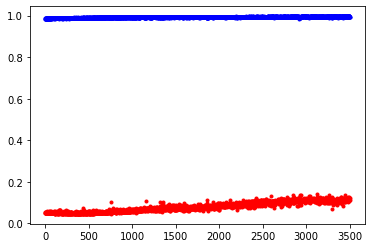

In [116]:
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

In [119]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)
model.fit(X, Y, validation_split=0.33, epochs=2000, batch_size=500, callbacks=[early_stopping_callback])

Epoch 1/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0239 - accuracy: 0.9926 - val_loss: 0.0913 - val_accuracy: 0.9841
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.1042 - val_accuracy: 0.9888
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0190 - accuracy: 0.9952 - val_loss: 0.1184 - val_accuracy: 0.9860
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0212 - accuracy: 0.9936 - val_loss: 0.1182 - val_accuracy: 0.9865
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0186 - accuracy: 0.9947 - val_loss: 0.1057 - val_accuracy: 0.9883
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0165 - accuracy: 0.9952 - val_loss: 0.1045 - val_accuracy: 0.9893
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.1037 - val_accuracy: 0.9897
Epoch 8/2000
9/9 [==

9/9 [==============================] - 0s 4ms/step - loss: 0.0147 - accuracy: 0.9954 - val_loss: 0.1209 - val_accuracy: 0.9893
Epoch 118/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0144 - accuracy: 0.9959 - val_loss: 0.1165 - val_accuracy: 0.9893
Epoch 119/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0145 - accuracy: 0.9961 - val_loss: 0.1205 - val_accuracy: 0.9902
Epoch 120/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0153 - accuracy: 0.9952 - val_loss: 0.1086 - val_accuracy: 0.9874
Epoch 121/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0162 - accuracy: 0.9949 - val_loss: 0.1093 - val_accuracy: 0.9902
Epoch 122/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0187 - accuracy: 0.9952 - val_loss: 0.1279 - val_accuracy: 0.9874
Epoch 123/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0172 - accuracy: 0.9945 - val_loss: 0.1087 - val_accuracy: 0.9869
Epoch 124/2000
9/9 [=

In [120]:
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

204/204 [==============================] - 0s 695us/step - loss: 0.0500 - accuracy: 0.9932

 Accuracy: 0.9932


In [121]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
 
import pandas as pd
import numpy
import os
import tensorflow as tf
  
# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv('../data/wine.csv', header=None)
df = df_pre.sample(frac=0.15)
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]
 
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  
# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

In [122]:
# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)
 
model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 1.20689, saving model to ./model/01-1.2069.hdf5

Epoch 00002: val_loss improved from 1.20689 to 0.86037, saving model to ./model/02-0.8604.hdf5

Epoch 00003: val_loss improved from 0.86037 to 0.57772, saving model to ./model/03-0.5777.hdf5

Epoch 00004: val_loss did not improve from 0.57772

Epoch 00005: val_loss did not improve from 0.57772

Epoch 00006: val_loss improved from 0.57772 to 0.53607, saving model to ./model/06-0.5361.hdf5

Epoch 00007: val_loss improved from 0.53607 to 0.44392, saving model to ./model/07-0.4439.hdf5

Epoch 00008: val_loss improved from 0.44392 to 0.44263, saving model to ./model/08-0.4426.hdf5

Epoch 00009: val_loss improved from 0.44263 to 0.43578, saving model to ./model/09-0.4358.hdf5

Epoch 00010: val_loss improved from 0.43578 to 0.41058, saving model to ./model/10-0.4106.hdf5

Epoch 00011: val_loss improved from 0.41058 to 0.37877, saving model to ./model/11-0.3788.hdf5

Epoch 00012: val_loss improved from


Epoch 00110: val_loss did not improve from 0.17680

Epoch 00111: val_loss did not improve from 0.17680

Epoch 00112: val_loss did not improve from 0.17680

Epoch 00113: val_loss improved from 0.17680 to 0.17677, saving model to ./model/113-0.1768.hdf5

Epoch 00114: val_loss improved from 0.17677 to 0.17463, saving model to ./model/114-0.1746.hdf5

Epoch 00115: val_loss improved from 0.17463 to 0.17291, saving model to ./model/115-0.1729.hdf5

Epoch 00116: val_loss improved from 0.17291 to 0.17257, saving model to ./model/116-0.1726.hdf5

Epoch 00117: val_loss did not improve from 0.17257

Epoch 00118: val_loss did not improve from 0.17257

Epoch 00119: val_loss did not improve from 0.17257

Epoch 00120: val_loss did not improve from 0.17257

Epoch 00121: val_loss did not improve from 0.17257

Epoch 00122: val_loss did not improve from 0.17257

Epoch 00123: val_loss did not improve from 0.17257

Epoch 00124: val_loss did not improve from 0.17257

Epoch 00125: val_loss did not improve f


Epoch 00239: val_loss did not improve from 0.12621

Epoch 00240: val_loss did not improve from 0.12621

Epoch 00241: val_loss did not improve from 0.12621

Epoch 00242: val_loss did not improve from 0.12621

Epoch 00243: val_loss improved from 0.12621 to 0.12201, saving model to ./model/243-0.1220.hdf5

Epoch 00244: val_loss improved from 0.12201 to 0.12142, saving model to ./model/244-0.1214.hdf5

Epoch 00245: val_loss did not improve from 0.12142

Epoch 00246: val_loss did not improve from 0.12142

Epoch 00247: val_loss did not improve from 0.12142

Epoch 00248: val_loss did not improve from 0.12142

Epoch 00249: val_loss improved from 0.12142 to 0.12007, saving model to ./model/249-0.1201.hdf5

Epoch 00250: val_loss did not improve from 0.12007

Epoch 00251: val_loss did not improve from 0.12007

Epoch 00252: val_loss did not improve from 0.12007

Epoch 00253: val_loss did not improve from 0.12007

Epoch 00254: val_loss improved from 0.12007 to 0.11811, saving model to ./model/254-


Epoch 00383: val_loss did not improve from 0.09418

Epoch 00384: val_loss improved from 0.09418 to 0.09399, saving model to ./model/384-0.0940.hdf5

Epoch 00385: val_loss improved from 0.09399 to 0.09305, saving model to ./model/385-0.0931.hdf5

Epoch 00386: val_loss did not improve from 0.09305

Epoch 00387: val_loss did not improve from 0.09305

Epoch 00388: val_loss did not improve from 0.09305

Epoch 00389: val_loss improved from 0.09305 to 0.09037, saving model to ./model/389-0.0904.hdf5

Epoch 00390: val_loss did not improve from 0.09037

Epoch 00391: val_loss did not improve from 0.09037

Epoch 00392: val_loss did not improve from 0.09037

Epoch 00393: val_loss improved from 0.09037 to 0.09027, saving model to ./model/393-0.0903.hdf5

Epoch 00394: val_loss did not improve from 0.09027

Epoch 00395: val_loss did not improve from 0.09027

Epoch 00396: val_loss did not improve from 0.09027

Epoch 00397: val_loss did not improve from 0.09027

Epoch 00398: val_loss improved from 0.0


Epoch 00526: val_loss did not improve from 0.07570

Epoch 00527: val_loss did not improve from 0.07570

Epoch 00528: val_loss did not improve from 0.07570

Epoch 00529: val_loss did not improve from 0.07570

Epoch 00530: val_loss did not improve from 0.07570

Epoch 00531: val_loss did not improve from 0.07570

Epoch 00532: val_loss did not improve from 0.07570

Epoch 00533: val_loss improved from 0.07570 to 0.07385, saving model to ./model/533-0.0739.hdf5

Epoch 00534: val_loss did not improve from 0.07385

Epoch 00535: val_loss did not improve from 0.07385

Epoch 00536: val_loss did not improve from 0.07385

Epoch 00537: val_loss did not improve from 0.07385

Epoch 00538: val_loss did not improve from 0.07385

Epoch 00539: val_loss did not improve from 0.07385

Epoch 00540: val_loss did not improve from 0.07385

Epoch 00541: val_loss did not improve from 0.07385

Epoch 00542: val_loss did not improve from 0.07385

Epoch 00543: val_loss did not improve from 0.07385

Epoch 00544: val_l


Epoch 00678: val_loss did not improve from 0.06589

Epoch 00679: val_loss did not improve from 0.06589

Epoch 00680: val_loss did not improve from 0.06589

Epoch 00681: val_loss did not improve from 0.06589

Epoch 00682: val_loss did not improve from 0.06589

Epoch 00683: val_loss improved from 0.06589 to 0.06585, saving model to ./model/683-0.0658.hdf5

Epoch 00684: val_loss did not improve from 0.06585

Epoch 00685: val_loss did not improve from 0.06585

Epoch 00686: val_loss did not improve from 0.06585

Epoch 00687: val_loss improved from 0.06585 to 0.06521, saving model to ./model/687-0.0652.hdf5

Epoch 00688: val_loss did not improve from 0.06521

Epoch 00689: val_loss did not improve from 0.06521

Epoch 00690: val_loss did not improve from 0.06521

Epoch 00691: val_loss did not improve from 0.06521

Epoch 00692: val_loss did not improve from 0.06521

Epoch 00693: val_loss did not improve from 0.06521

Epoch 00694: val_loss did not improve from 0.06521

Epoch 00695: val_loss did


Epoch 00832: val_loss did not improve from 0.06239

Epoch 00833: val_loss did not improve from 0.06239

Epoch 00834: val_loss did not improve from 0.06239

Epoch 00835: val_loss did not improve from 0.06239

Epoch 00836: val_loss did not improve from 0.06239

Epoch 00837: val_loss did not improve from 0.06239

Epoch 00838: val_loss did not improve from 0.06239

Epoch 00839: val_loss did not improve from 0.06239

Epoch 00840: val_loss did not improve from 0.06239

Epoch 00841: val_loss did not improve from 0.06239

Epoch 00842: val_loss did not improve from 0.06239

Epoch 00843: val_loss did not improve from 0.06239

Epoch 00844: val_loss did not improve from 0.06239

Epoch 00845: val_loss did not improve from 0.06239

Epoch 00846: val_loss did not improve from 0.06239

Epoch 00847: val_loss did not improve from 0.06239

Epoch 00848: val_loss improved from 0.06239 to 0.06232, saving model to ./model/848-0.0623.hdf5

Epoch 00849: val_loss did not improve from 0.06232

Epoch 00850: val_l


Epoch 00986: val_loss did not improve from 0.05912

Epoch 00987: val_loss did not improve from 0.05912

Epoch 00988: val_loss did not improve from 0.05912

Epoch 00989: val_loss improved from 0.05912 to 0.05870, saving model to ./model/989-0.0587.hdf5

Epoch 00990: val_loss did not improve from 0.05870

Epoch 00991: val_loss did not improve from 0.05870

Epoch 00992: val_loss did not improve from 0.05870

Epoch 00993: val_loss did not improve from 0.05870

Epoch 00994: val_loss did not improve from 0.05870

Epoch 00995: val_loss did not improve from 0.05870

Epoch 00996: val_loss did not improve from 0.05870

Epoch 00997: val_loss did not improve from 0.05870

Epoch 00998: val_loss did not improve from 0.05870

Epoch 00999: val_loss did not improve from 0.05870

Epoch 01000: val_loss did not improve from 0.05870

Epoch 01001: val_loss did not improve from 0.05870

Epoch 01002: val_loss did not improve from 0.05870

Epoch 01003: val_loss did not improve from 0.05870

Epoch 01004: val_l


Epoch 01148: val_loss did not improve from 0.05720

Epoch 01149: val_loss did not improve from 0.05720

Epoch 01150: val_loss did not improve from 0.05720

Epoch 01151: val_loss did not improve from 0.05720

Epoch 01152: val_loss did not improve from 0.05720

Epoch 01153: val_loss did not improve from 0.05720

Epoch 01154: val_loss did not improve from 0.05720

Epoch 01155: val_loss did not improve from 0.05720

Epoch 01156: val_loss did not improve from 0.05720

Epoch 01157: val_loss did not improve from 0.05720

Epoch 01158: val_loss did not improve from 0.05720

Epoch 01159: val_loss did not improve from 0.05720

Epoch 01160: val_loss did not improve from 0.05720

Epoch 01161: val_loss did not improve from 0.05720

Epoch 01162: val_loss did not improve from 0.05720

Epoch 01163: val_loss did not improve from 0.05720

Epoch 01164: val_loss did not improve from 0.05720

Epoch 01165: val_loss did not improve from 0.05720

Epoch 01166: val_loss did not improve from 0.05720

Epoch 01167

In [123]:
import pandas as pd
 
df = pd.read_csv("../data/housing.csv", delim_whitespace=True, header=None)
 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [124]:
print(df.head())

        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [127]:
dataset = df.values
X = dataset[:,0:13]
Y = dataset[:,13]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)
 
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=200, batch_size=10)
  
# 예측 값과 실제 값의 비교
Y_prediction = model.predict(X_test).flatten()
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

Epoch 1/200
36/36 [==============================] - 0s 722us/step - loss: 445.8820
Epoch 2/200
36/36 [==============================] - 0s 750us/step - loss: 101.4348
Epoch 3/200
36/36 [==============================] - 0s 722us/step - loss: 72.0172
Epoch 4/200
36/36 [==============================] - 0s 750us/step - loss: 65.4271
Epoch 5/200
36/36 [==============================] - 0s 722us/step - loss: 60.2194
Epoch 6/200
36/36 [==============================] - 0s 694us/step - loss: 59.4199
Epoch 7/200
36/36 [==============================] - 0s 694us/step - loss: 59.0001
Epoch 8/200
36/36 [==============================] - 0s 722us/step - loss: 52.4762
Epoch 9/200
36/36 [==============================] - 0s 722us/step - loss: 52.9014
Epoch 10/200
36/36 [==============================] - 0s 694us/step - loss: 47.8234
Epoch 11/200
36/36 [==============================] - 0s 694us/step - loss: 48.3185
Epoch 12/200
36/36 [==============================] - 0s 722us/step - loss: 48.3247

36/36 [==============================] - 0s 666us/step - loss: 18.0735
Epoch 195/200
36/36 [==============================] - 0s 694us/step - loss: 18.5014
Epoch 196/200
36/36 [==============================] - 0s 750us/step - loss: 16.6157
Epoch 197/200
36/36 [==============================] - 0s 638us/step - loss: 17.6362
Epoch 198/200
36/36 [==============================] - 0s 694us/step - loss: 18.3844
Epoch 199/200
36/36 [==============================] - 0s 694us/step - loss: 17.7600
Epoch 200/200
36/36 [==============================] - 0s 1ms/step - loss: 16.2658
실제가격: 22.600, 예상가격: 27.710
실제가격: 50.000, 예상가격: 32.113
실제가격: 23.000, 예상가격: 25.549
실제가격: 8.300, 예상가격: 16.273
실제가격: 21.200, 예상가격: 20.456
실제가격: 19.900, 예상가격: 23.451
실제가격: 20.600, 예상가격: 24.376
실제가격: 18.700, 예상가격: 23.810
실제가격: 16.100, 예상가격: 18.145
실제가격: 18.600, 예상가격: 14.320
